In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
datapath = Path("./data/cluster/")

In [6]:
df = pd.read_csv(datapath / "Countries.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       241 non-null    object 
 1   Longitude  241 non-null    float64
 2   Latitude   241 non-null    float64
 3   continent  241 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.7+ KB


<Axes: xlabel='Longitude', ylabel='Latitude'>

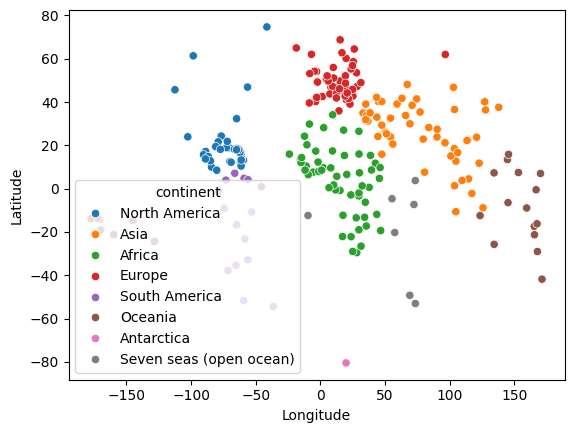

In [17]:
sns.scatterplot(data=df, x="Longitude", y="Latitude", hue="continent")

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
features = ["Longitude", "Latitude"]
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(df[features]), columns=features)

In [20]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

KMeans()

In [26]:
df = pd.read_csv(datapath / "customer_survey.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satisfaction  30 non-null     int64  
 1   Loyalty       30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [28]:
features = ["Satisfaction", "Loyalty"]
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(df[features]), columns=features)

In [56]:
weights = list()
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    weights.append(kmeans.inertia_)

<Axes: >

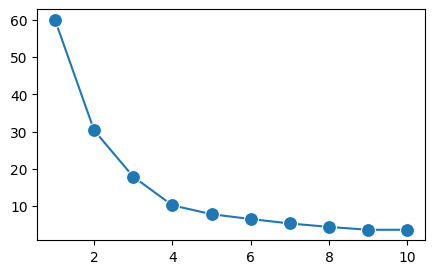

In [57]:
plt.figure(figsize=(5,3))
sns.lineplot(x=range(1,11), y=weights, marker='o', markersize=10)

<Axes: xlabel='Satisfaction', ylabel='Loyalty'>

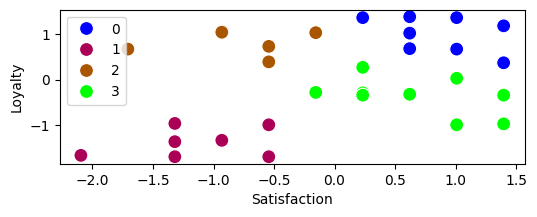

In [68]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
pred = kmeans.predict(X)
plt.figure(figsize=(6,2))
sns.scatterplot(data=X, x="Satisfaction", y="Loyalty", hue=pred, s=100, palette="brg")

<Axes: xlabel='Satisfaction', ylabel='Loyalty'>

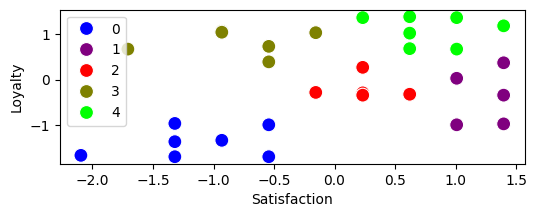

In [69]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
pred = kmeans.predict(X)
plt.figure(figsize=(6,2))
sns.scatterplot(data=X, x="Satisfaction", y="Loyalty", hue=pred, s=100, palette="brg")